# Modules and Library

In [1]:
import os
import glob
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from PIL import Image

#imoprt labels.py
from labels import Labels

In [2]:
class CustomDataset(Dataset):
    def __init__(self, root="dataset", transform=None):
        self.imagespath  = glob.glob('dataset/images/*.png')
        self.labelspath = glob.glob('dataset/labels/*.png') 
        self.root = root
        
        # try to print the path
        print("File Path: ", self.imagespath)
        print("File Path: ", self.labelspath)
        self.transform = transform
    
    def __len__(self) -> int:        
        return len(self.images)
    
    def __getitem__(self,index):
        if torch.is_tensor(index):
            index = index.tolist()
        
        #load image Dataset
        img_data = self.imagespath[index]
        image = Image.open(img_data)
        
        #load label Dataset
        label_data = self.labelspath[index]
        label = Image.open(label_data)
        
        #dictionary between image and label
        sample_data = {"image":image, "label":label}
        
        if self.transform:
            sample_data = self.transform(sample_data)
        return sample_data
            
    
    def shows(self, image, label):
        # Complete the implementation.
        pass

# Horizontal Flip

In [5]:
class HorizontalFlip():
    def __init__(self)-> None:
        pass
    
    def __call__(self, sample) -> dict:
        image = sample["image"]
        label = sample["label"]
        transformedImage = transforms.RandomHorizontalFlip(p=1)(image)
        transformedLabel = transforms.RandomHorizontalFlip(p=1)(label)
        
        return {"image":transformedImage, "label":transformedLabel}
        

File Path:  ['dataset/images/a_4564.png', 'dataset/images/78_iff_12.png', 'dataset/images/uff_987_stw.png', 'dataset/images/xz_77i.png', 'dataset/images/udu112_st55a.png']
File Path:  ['dataset/labels/a_4564.png', 'dataset/labels/78_iff_12.png', 'dataset/labels/uff_987_stw.png', 'dataset/labels/xz_77i.png', 'dataset/labels/udu112_st55a.png']


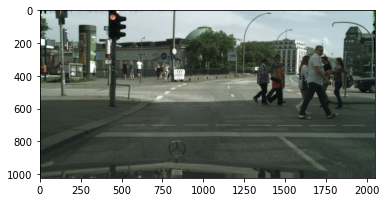

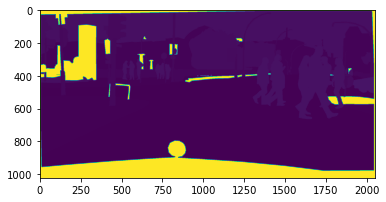

In [6]:

dataset = CustomDataset(transform = HorizontalFlip())
trial = dataset[1]
plt.imshow(trial["image"])
plt.figure()
plt.imshow(trial["label"])